In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 读入iris数据
np.random.seed(5)
X, y = datasets.make_moons(300, noise=0.1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.7, random_state = 50)


In [36]:
#由于后面使用sklearn的naive_bayes时，提示样例不能为负数，所以这里对样例每个值加上2，且并不影响分布情况
for i in X:
    i[0]+=2
    i[1]+=2

adaboost accuracy:  0.8566666666666667


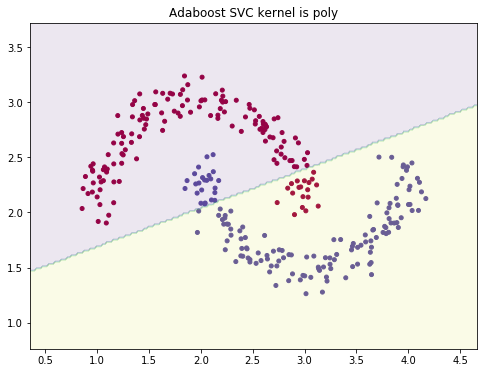

In [41]:
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Adaboost SVC kernel is poly')
abc = AdaBoostClassifier(SVC(C=30, kernel='linear'),
                         algorithm="SAMME",
                         n_estimators=50)
abc.fit(X, y)
y_pred = abc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('adaboost accuracy: ', acc)

plot_step = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1)

adaboost accuracy:  1.0


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/co

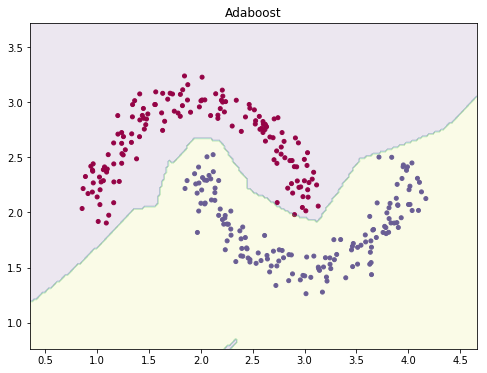

In [40]:
plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Adaboost')
abc = AdaBoostClassifier(SVC(C=30, kernel='poly'),
                         algorithm="SAMME",
                         n_estimators=50)
abc.fit(X, y)
y_pred = abc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('adaboost accuracy: ', acc)

plot_step = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/co

adaboost accuracy:  1.0


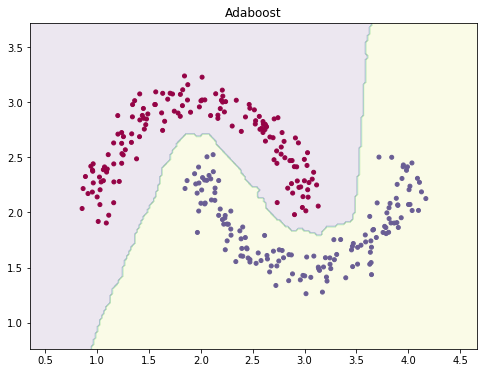

In [39]:
plt.figure(3, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Adaboost')
abc = AdaBoostClassifier(SVC(C=30, kernel='rbf'),
                         algorithm="SAMME",
                         n_estimators=50)
abc.fit(X, y)
y_pred = abc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('adaboost accuracy: ', acc)

plot_step = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = abc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.1)

	分别把核函数改为线性、多项式、高斯核。从三张图象可以看出，分类结果越来越好，高斯核的分类结果甚至达到了准确度百分之百（如果所有样例不加2变为正数，多项式的准确率并不是百分之百，但高斯一直是百分之百）。显然，该样例是非线性的，而且简单地使用多项式不一定能拟合，可见此数据的分布非线性极强，用高斯核拟合最为合适。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


voting accuracy:  0.9833333333333333


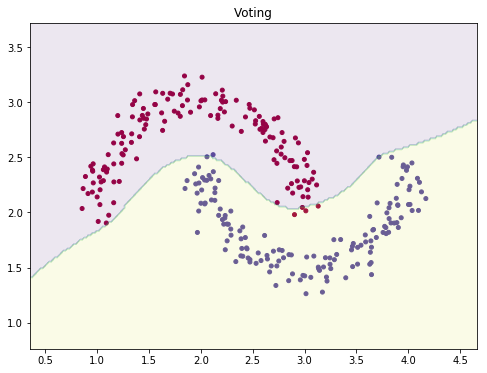

In [42]:
cf1 = SVC(C=10, kernel='rbf',probability=True)
cf2 = SVC(C=10, kernel='linear', probability=True)
cf3 = SVC(C=10, kernel='poly', probability=True)
vc = VotingClassifier(estimators=[('svc_rbf', cf1), ('svm_linear', cf2),
                                    ('svc_poly', cf3)],
                        voting='soft')
vc.fit(X, y)
y_pred = vc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('voting accuracy: ', acc)

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Voting')
Z = vc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.1)

plt.show()

voting accuracy:  0.8733333333333333


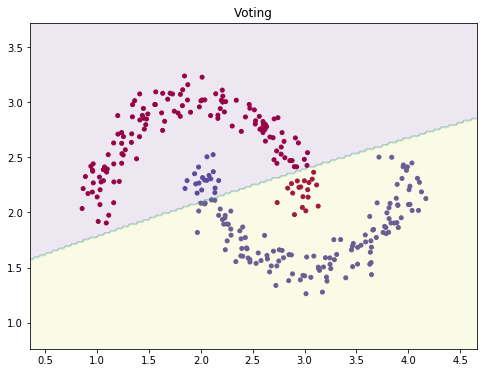

In [43]:
cf1 = GaussianNB()
cf2 = MultinomialNB()
cf3 = BernoulliNB()
vc = VotingClassifier(estimators=[('bayes_gaussian', cf1), ('bayes_multion', cf2)
                       ,('bayes_bern', cf3) ]
                       , voting='soft')
vc.fit(X, y)
y_pred = vc.predict(X)
acc = metrics.accuracy_score(y, y_pred)
print('voting accuracy: ', acc)

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=16, c=y, cmap=plt.cm.Spectral)
plt.title('Voting')
Z = vc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=0.1)

plt.show()

	朴素贝叶斯是基于概率的算法，在该样例中，如果以一个直线划分已经是准确率比较高的算法，符合预期的概率也比较高，所以朴素贝叶斯很难做出一个更加完美的复杂非线性模型。
    在投票集成时，支持向量机的使用结果远好于朴素贝叶斯。